# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

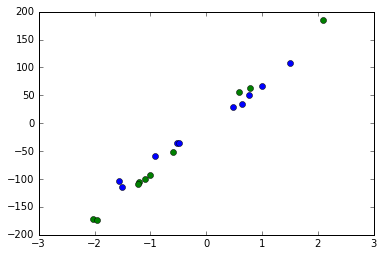

In [3]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 10 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)

plt.plot(x1_test,y1_test,'o')
plt.plot(x1,y1,'o')



############### More DATASETS

# (x2,y2) = 

# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

0.897601634775


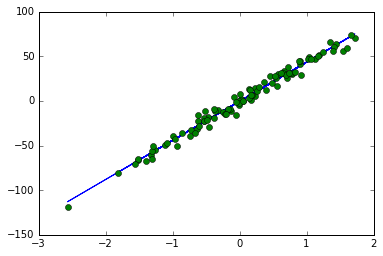

In [3]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has
print regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

## Your analysis


--Just write here--

In [ ]:
#Add a serious outlier and see what happens

#Example of creating big outlier:
x1[-1] = 20 #negative indices begin at the end. So this changes the last values of x1 and y1
y1[-1] = 300

regr.fit(x1,y1)

#Print the score that the fit has
print regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()
#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [4]:
#Make a prediction function h
def prediction_function(x,theta0,theta1):

    y = theta1*x+theta0
    return y

        
    

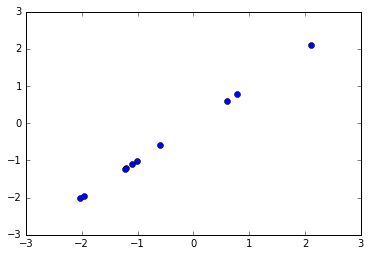

[[-1.20882072]
 [ 2.10190747]
 [-0.59003519]
 [-2.02307534]
 [-1.09891887]
 [-1.21792963]
 [-1.95829626]
 [-1.00447477]
 [ 0.77928808]
 [ 0.59780474]]
[[-1.20882072]
 [ 2.10190747]
 [-0.59003519]
 [-2.02307534]
 [-1.09891887]
 [-1.21792963]
 [-1.95829626]
 [-1.00447477]
 [ 0.77928808]
 [ 0.59780474]]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


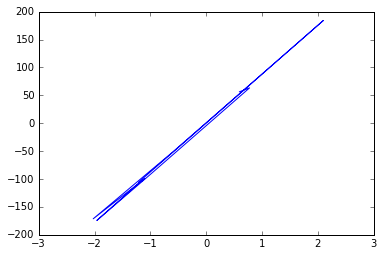

In [31]:
x_predict=prediction_function(x1,0,1)

plt.plot(x1,prediction_function(x1,0,1),'o')
plt.show()


print(x_predict)
print(x1)
plt.plot(x1,y1)
print(range(1,100))

In [8]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
   
    cost = sum((x_predict-y)**2)/(2*size(y))   
    return cost

        
    
    

In [11]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict,y, x):
    dtheta0= sum(x_predict-y)/size(y)
    dtheta1= sum((x_predict-y)*x)/size(y)
    
    

    return dtheta0, dtheta1

    
        

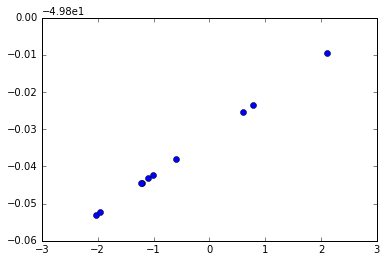

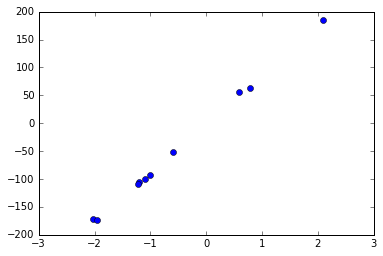

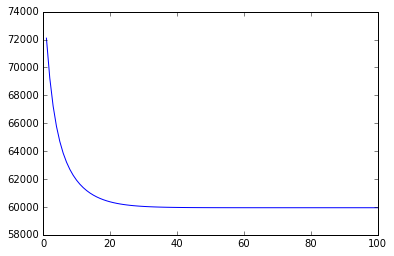

In [33]:
#These are some default parameters, see how playing with them affects the behavior

alpha = 0.01
theta0 =0
theta1 =1
x = x1
y = y1
iterations = 100
#Fill in the stopcondition yourself
stopcondition = 2

i = 0
cost = 10
costy=[]

#Try to save the output of the cost function at each iteration and plot it at the end
while (i < iterations) and (cost > stopcondition):

    x_predict =prediction_function(x,theta0,theta1)
    theta0=theta0-alpha*compute_gradient(x_predict,y, x)[0]
    theta1=theta1-alpha*compute_gradient(x_predict,y, x)[1]
    cost=cost_function(x_predict,y)
    costy.append(cost)
    i = i +1

plt.plot(x,prediction_function(x,theta0,theta1),'o')
plt.show()
plt.plot(x,y,'o')
plt.show()
plt.plot(range(1,101),costy)






## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

In [ ]:
For this particular case, cost funtions start to stabilize after around 20 iterations, but it really depends on the 
learning rate, sample size, etc. If the learning rates are too big, it will cause the cost function to increase instead
of decreasing. The trend of the cost function consists of rapid decrease at the beginning and eventual stabiliation. 

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.